In [8]:
original_data_path = "/notebooks/wedding_dataset_cleaned_v2a_all_col.csv"
synthetic_path = "/notebooks/wedding_dataset_cleaned_v2a_10col.csv"
path = "./artifacts"

In [9]:
import pandas as pd

In [10]:
original_dataset = pd.read_csv(real_data_path)
synthetic_dataset = pd.read_csv(fake_data_path)

/tmp/ipykernel_32/2611883753.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  synthetic_dataset = pd.read_csv(fake_data_path)


In [11]:
print(real_data.head())
print(fake_data.head())

   cust_id  ct_id    ct_creat_dte       concl_dte  ct_stat_cde    label  \
0       25      1  14/6/2020 0:00  15/6/2020 0:00            1  Default   
1      600      2  14/6/2020 1:00  15/6/2020 1:00            1  Default   
2      611      3  14/6/2020 2:00  15/6/2020 2:00            1  Default   
3      611      4  14/6/2020 3:00  15/6/2020 3:00            1  Default   
4      251      5  14/6/2020 4:00  15/6/2020 4:00            0  Default   

  sales_purchs_ind orig_book_dept_cde  book_dept_cde  orig_book_empl_nbr  ...  \
0          Default            Default            383                5404  ...   
1          Default            Default            626                7598  ...   
2          Default            Default            344                3179  ...   
3          Default            Default            548                6880  ...   
4          Default            Default            500                8663  ...   

   item_nbr   tag_price  mis_adjustment mis_cost_tax_incl mis_

/tmp/ipykernel_32/793420460.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_dataset[column_name], shade=True, color="blue", label="Original", ax=ax)
/tmp/ipykernel_32/793420460.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_dataset[column_name], shade=True, color="red", label="Synthetic")
/tmp/ipykernel_32/793420460.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_dataset[column_name], shade=True, color="blue", label="Original", ax=ax)
/tmp/ipykernel_32/793420460.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error 

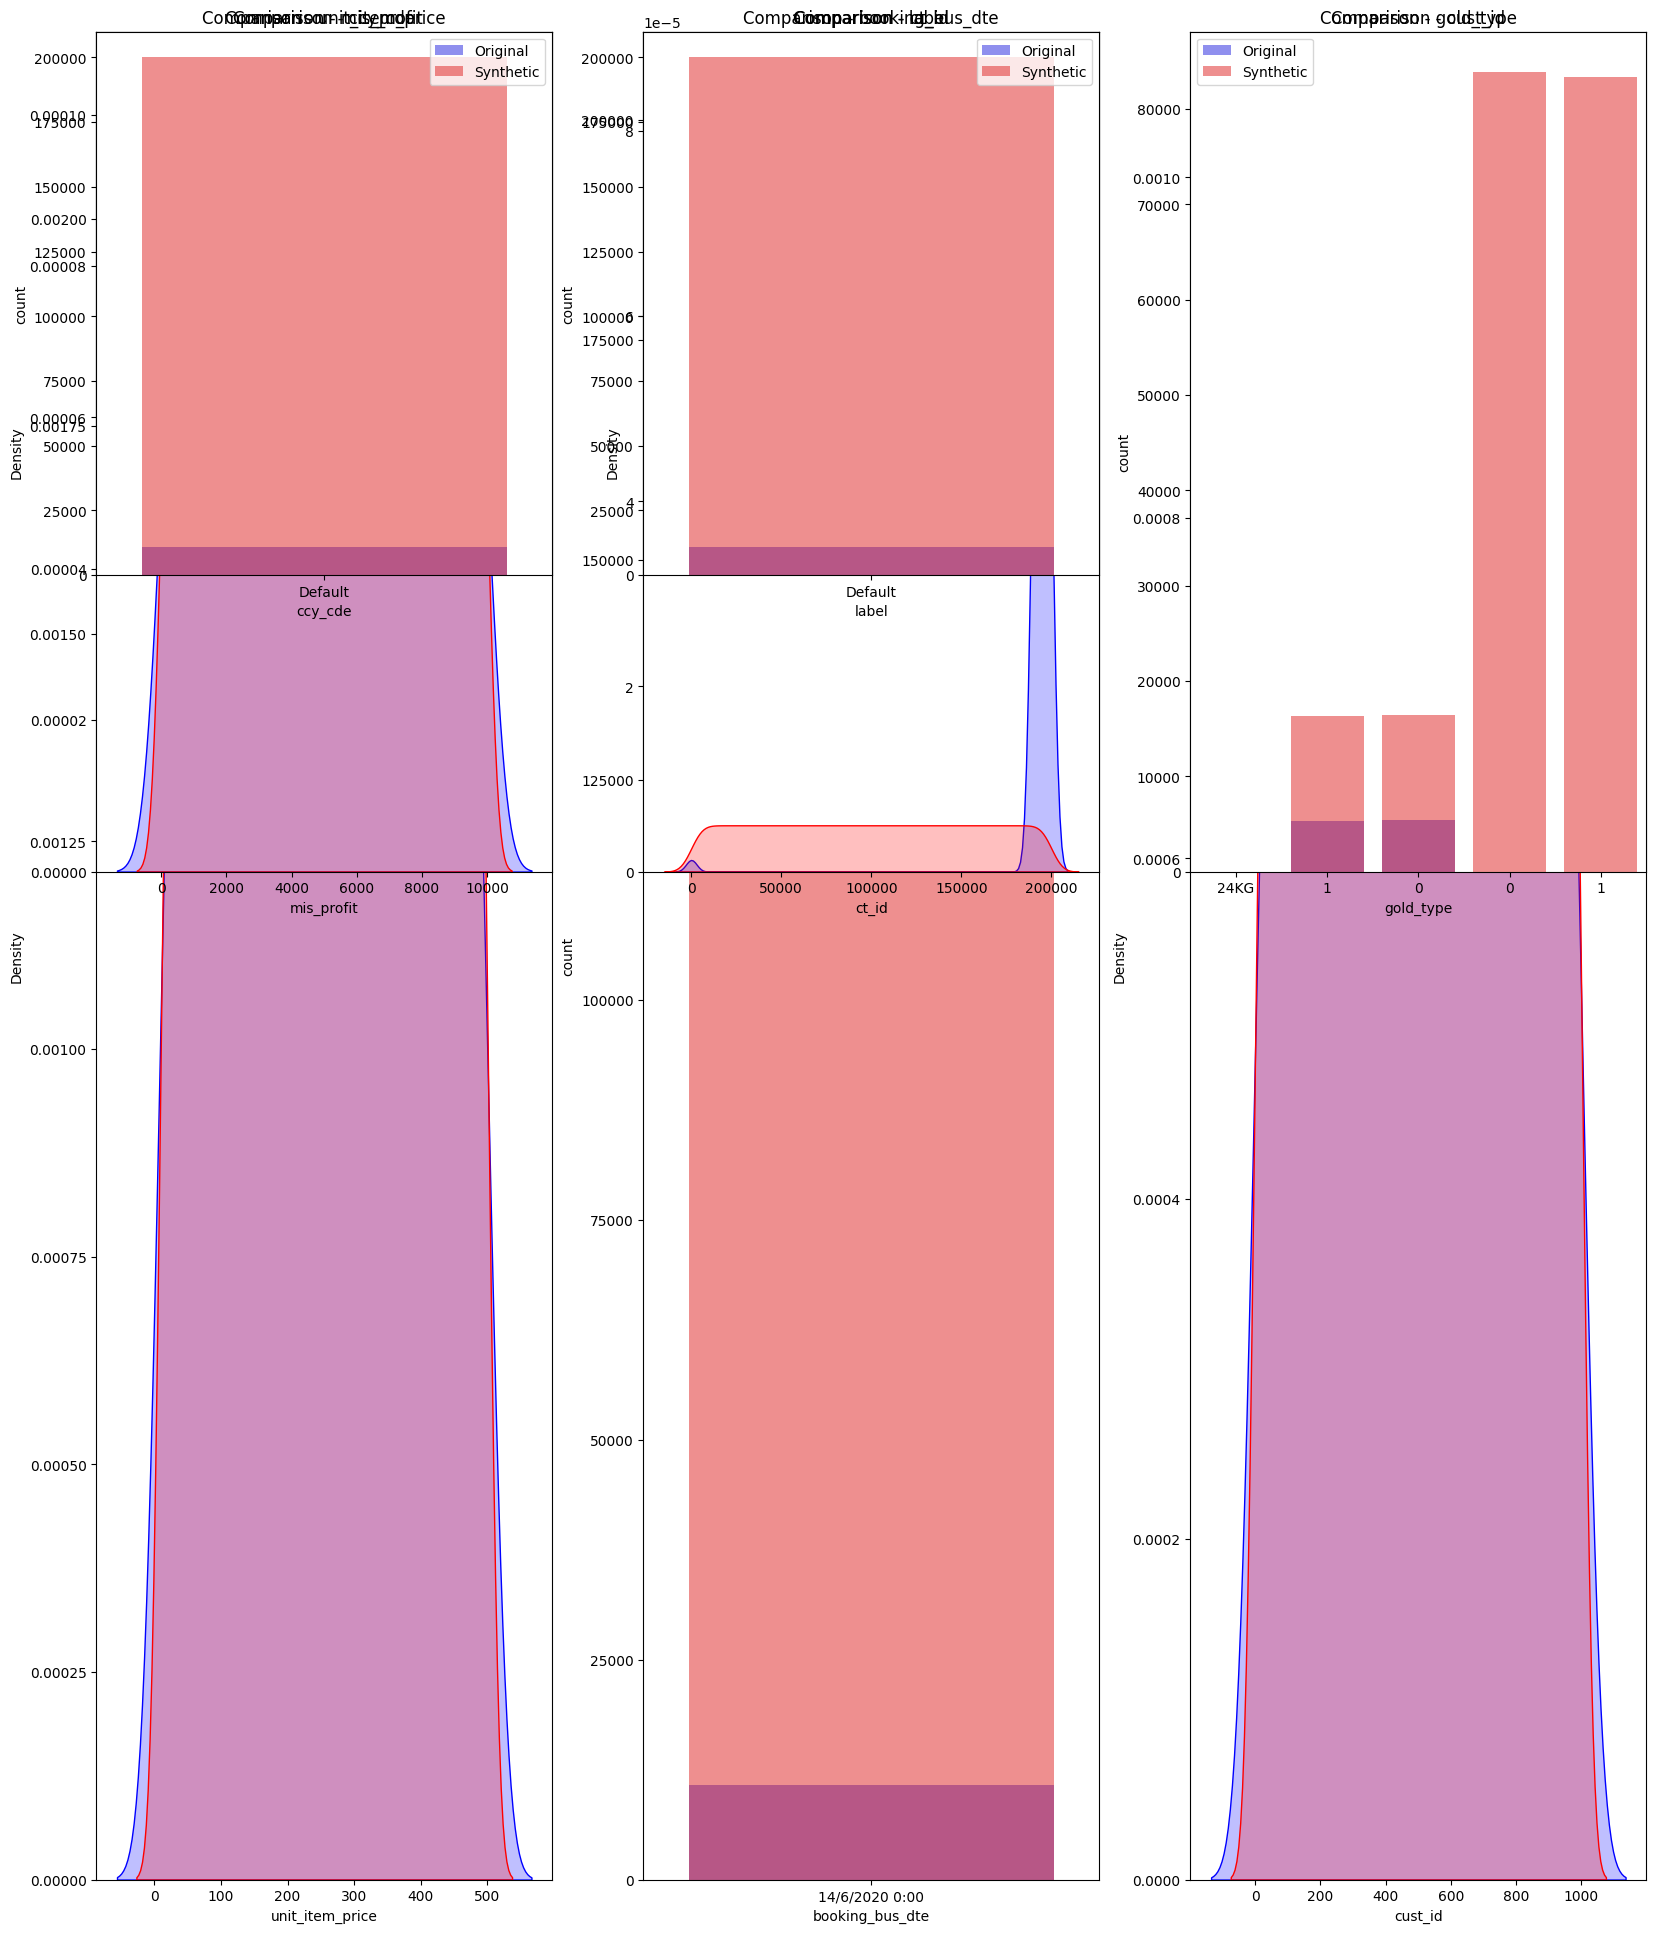

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your datasets here
# Example: 
# original_dataset = pd.read_csv('path_to_original_dataset.csv')
# synthetic_dataset = pd.read_csv('path_to_synthetic_dataset.csv')

# Identifying all overlapping columns between the two datasets
overlapping_columns = set(original_dataset.columns).intersection(set(synthetic_dataset.columns))

# Function to determine if a column is categorical or numerical
def is_categorical(column):
    return original_dataset[column].dtype == 'object'

# Adjusted plotting function for side-by-side plots with increased vertical spacing
def plot_comparison_side_by_side(columns, row, fig):
    for i, column_name in enumerate(columns):
        ax = fig.add_subplot(row, 3, i + 1)

        if is_categorical(column_name):
            # Categorical plot
            sns.countplot(x=column_name, data=original_dataset, color='blue', alpha=0.5, label='Original')
            sns.countplot(x=column_name, data=synthetic_dataset, color='red', alpha=0.5, label='Synthetic')
        else:
            # Numerical plot
            sns.kdeplot(original_dataset[column_name], shade=True, color="blue", label="Original", ax=ax)
            sns.kdeplot(synthetic_dataset[column_name], shade=True, color="red", label="Synthetic")

        ax.set_title(f'Comparison - {column_name}')
        ax.legend()

# Organizing the plots into rows with 3 plots each and increased vertical spacing
num_columns = len(overlapping_columns)
num_rows = -(-num_columns // 3)  # Ceiling division

fig = plt.figure(figsize=(20, 8 * num_rows))  # Adjusted figure size for increased vertical spacing

for i in range(num_rows):
    start_index = i * 3
    end_index = min(start_index + 3, num_columns)
    plot_comparison_side_by_side(list(overlapping_columns)[start_index:end_index], i + 1, fig)

fig.tight_layout(pad=3.0)  # Increased padding for spacing
plt.show()